# Import Module

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import RandomizedSearchCV, train_test_split, cross_val_predict


# Dataset Analysis

In [2]:
df = pd.read_csv("./csv/rgb/2020/jan/point-50-result.csv")
df

,R,G,B,Vre1,Vre2,Vre3,Nir,Swir1,Swir2,NNir,Label_id,Label_txt
0,695,806,471,381,222,227,186,65,48,163,1,water
1,676,812,533,438,239,265,204,84,74,166,1,water
2,570,705,521,476,286,303,250,115,116,249,1,water
3,503,814,676,1390,2538,3004,3154,1810,944,3423,1,water
4,370,575,372,878,2382,2979,3134,1973,954,3304,1,water
...,...,...,...,...,...,...,...,...,...,...,...,...
245,688,909,1286,1696,2057,2297,2449,3462,2426,2589,5,building
246,849,1082,1490,1756,2099,2314,2474,3714,2649,2596,5,building
247,980,1292,1772,2035,2256,2354,2404,3986,3397,2415,5,building
248,991,1334,1784,2096,2330,2481,2576,4081,3512,2609,5,building


In [3]:
df = df.drop("Label_id", axis=1)
df

,R,G,B,Vre1,Vre2,Vre3,Nir,Swir1,Swir2,NNir,Label_txt
0,695,806,471,381,222,227,186,65,48,163,water
1,676,812,533,438,239,265,204,84,74,166,water
2,570,705,521,476,286,303,250,115,116,249,water
3,503,814,676,1390,2538,3004,3154,1810,944,3423,water
4,370,575,372,878,2382,2979,3134,1973,954,3304,water
...,...,...,...,...,...,...,...,...,...,...,...
245,688,909,1286,1696,2057,2297,2449,3462,2426,2589,building
246,849,1082,1490,1756,2099,2314,2474,3714,2649,2596,building
247,980,1292,1772,2035,2256,2354,2404,3986,3397,2415,building
248,991,1334,1784,2096,2330,2481,2576,4081,3512,2609,building


In [4]:
df.describe()

,R,G,B,Vre1,Vre2,Vre3,Nir,Swir1,Swir2,NNir
count,250.000000,250.000000,250.0000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,870.036000,1061.180000,1049.4080,1339.736000,1927.108000,2229.552000,2298.500000,2220.412000,1779.816000,2386.336000
std,855.471214,940.828121,1102.1459,1080.709596,1041.139232,1173.822653,1228.630387,1812.204877,1974.901968,1266.780877
min,127.000000,220.000000,118.0000,169.000000,117.000000,133.000000,107.000000,49.000000,36.000000,101.000000
25%,361.000000,494.500000,296.0000,588.250000,1395.750000,1709.250000,1759.500000,1103.000000,454.250000,1937.750000
50%,545.500000,719.000000,450.0000,835.000000,2147.000000,2422.000000,2545.000000,1585.000000,752.000000,2658.500000
75%,934.500000,1185.500000,1671.0000,1991.250000,2446.250000,2989.000000,3120.000000,3709.000000,3117.000000,3221.000000
max,5524.000000,6056.000000,6616.0000,6771.000000,6165.000000,6346.000000,6364.000000,10475.000000,13281.000000,6631.000000


In [5]:
df['Label_txt'].value_counts()

Label_txt
water                50
vegetation_type_1    50
vegetation_type_2    50
forest               50
building             50
Name: count, dtype: int64

In [39]:
df.dtypes

R            float64
G            float64
B            float64
Vre1         float64
Vre2         float64
Vre3         float64
Nir          float64
Swir1        float64
Swir2        float64
NNir         float64
Label_txt     object
dtype: object

In [38]:
df['R'] = df['R'].astype(float)
df['G'] = df['G'].astype(float)
df['B'] = df['B'].astype(float)
df['Vre1'] = df['Vre1'].astype(float)
df['Vre2'] = df['Vre2'].astype(float)
df['Vre3'] = df['R'].astype(float)
df['Nir'] = df['Nir'].astype(float)
df['Swir1'] = df['Swir1'].astype(float)
df['Swir2'] = df['Swir2'].astype(float)
df['NNir'] = df['NNir'].astype(float)

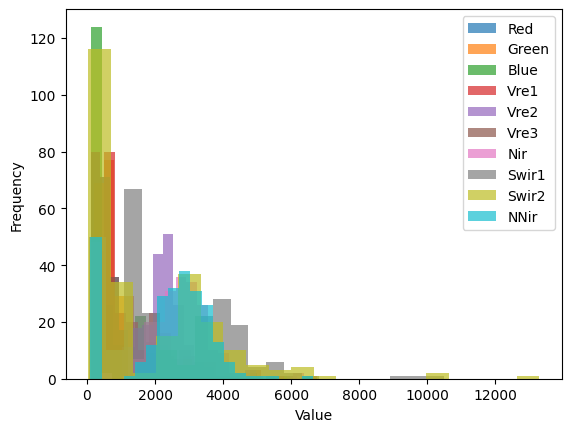

In [40]:
plt.hist(df['R'], bins=20, alpha=0.7, label='Red')
plt.hist(df['G'], bins=20, alpha=0.7, label='Green')
plt.hist(df['B'], bins=20, alpha=0.7, label='Blue')
plt.hist(df['Vre1'], bins=20, alpha=0.7, label='Vre1')
plt.hist(df['Vre2'], bins=20, alpha=0.7, label='Vre2')
plt.hist(df['Vre3'], bins=20, alpha=0.7, label='Vre3')
plt.hist(df['Nir'], bins=20, alpha=0.7, label='Nir')
plt.hist(df['Swir1'], bins=20, alpha=0.7, label='Swir1')
plt.hist(df['Swir2'], bins=20, alpha=0.7, label='Swir2')
plt.hist(df['NNir'], bins=20, alpha=0.7, label='NNir')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

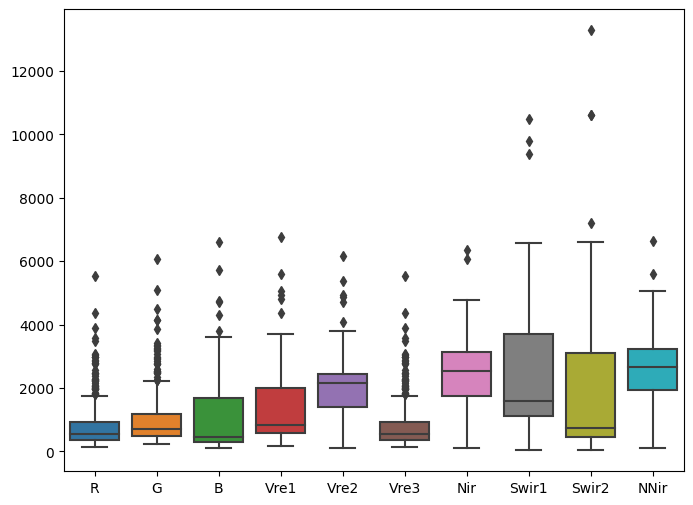

In [41]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df)
plt.show()

# Feature Extraction

In [100]:
# NDVI
from utils.index.vegetation_index import ndvi_index
ndvi_list = []
for index, row in df.iterrows():
    ndvi = ndvi_index(row['R'], row['Nir'])
    ndvi_list.append(ndvi)

In [101]:
# Tassled Cap Transformation
# 1. Brightness
from utils.index.vegetation_index import brightness_sentinel_2_tasseled_cap, greenness_sentinel_2_tasseled_cap, wetness_sentinel_2_tasseled_cap 
brightness = []
for index, row in df.iterrows():
    res = brightness_sentinel_2_tasseled_cap(
        row['B'],
        row['G'],
        row['R'],
        row['Nir'],
        row['Swir1'],
        row['Swir2'],
    )
    brightness.append(res)

# 2. Greenness
greenness = []
for index, row in df.iterrows():
    res = greenness_sentinel_2_tasseled_cap(
        row['B'],
        row['G'],
        row['R'],
        row['Nir'],
        row['Swir1'],
        row['Swir2'],
    )
    greenness.append(res)

# 3. Wetness
wetness = []
for index, row in df.iterrows():
    res = wetness_sentinel_2_tasseled_cap(
        row['B'],
        row['G'],
        row['R'],
        row['Nir'],
        row['Swir1'],
        row['Swir2'],
    )
    wetness.append(res)


In [104]:
index_df = pd.DataFrame({
    'ndvi': ndvi_list,
    'brightness' : brightness,
    'greenness' : greenness,
    'wetness' : wetness,
    'label' : df['Label_txt']
})

In [105]:
index_df

,ndvi,brightness,greenness,wetness,label
0,-0.5777525539160046,870.2951,-673.0552,313.5460,water
1,-0.5363636363636364,910.3872,-683.8151,302.9010,water
2,-0.3902439024390244,877.6589,-572.7265,224.8230,water
3,0.7249111293409899,3607.8153,1069.1900,-1134.5581,water
4,0.7888127853881278,3390.8803,1311.2966,-1411.2720,water
...,...,...,...,...,...
245,0.5613643608543194,4099.0763,-148.0048,-3058.5554,building
246,0.48901594944327414,4413.8128,-403.6766,-3259.3595,building
247,0.42080378250591016,4798.4769,-899.0702,-3738.2422,building
248,0.4443509952340903,4991.4309,-841.3649,-3839.4216,building


In [117]:
X = index_df[['ndvi', 'brightness', 'greenness', 'wetness']]
y = index_df['label']

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [116]:
best_model = RandomForestClassifier()

best_model.fit(X_train, y_train)

RandomForestClassifier()

In [111]:
predicted_labels = cross_val_predict(best_model, X, y, cv=10)

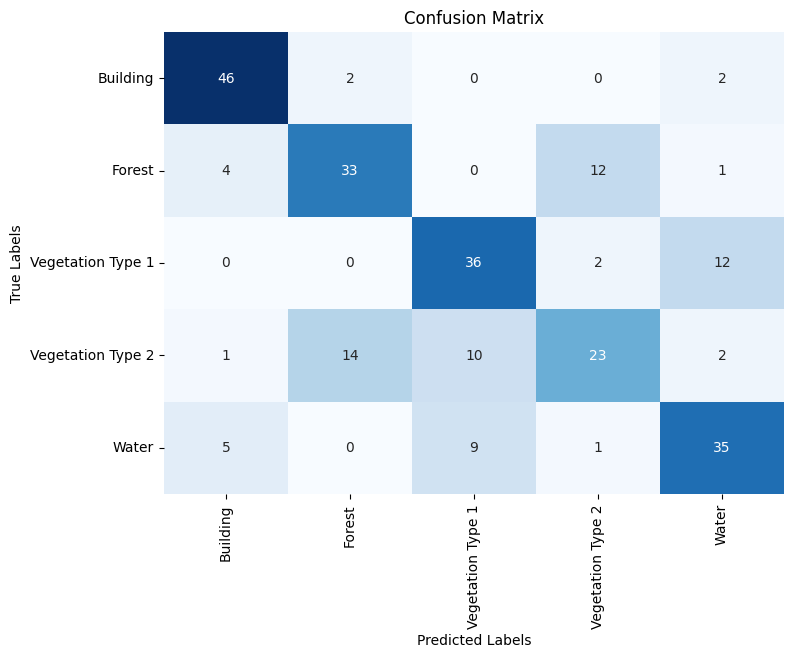

In [112]:
cm = confusion_matrix(y, predicted_labels)
cm_label = ['Building', 'Forest', 'Vegetation Type 1', 'Vegetation Type 2', 'Water']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=cm_label, yticklabels=cm_label)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [113]:
report = classification_report(y, predicted_labels)
print("Classification Report:")
print(report)

Classification Report:
                   precision    recall  f1-score   support

         building       0.82      0.92      0.87        50
           forest       0.67      0.66      0.67        50
vegetation_type_1       0.65      0.72      0.69        50
vegetation_type_2       0.61      0.46      0.52        50
            water       0.67      0.70      0.69        50

         accuracy                           0.69       250
        macro avg       0.69      0.69      0.69       250
     weighted avg       0.69      0.69      0.69       250



In [114]:
from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y, predicted_labels)
print("Kappa Cohen :", kappa)

Kappa Cohen : 0.615


In [ ]:
import joblib
model_output_file = './model/model8'
joblib.dump(best_model, f'{model_output_file}.joblib')

In [ ]:
import rasterio
import joblib
import pandas as pd
import numpy as np

loaded_model = joblib.load('./model/model8.joblib')

list = []
with rasterio.open('./qgis/2020/jan/clipped.tif') as src:

    metadata = src.meta

    b2 = src.read(1)
    b3 = src.read(2)
    b4 = src.read(3)
    b5 = src.read(4)
    b6 = src.read(5)
    b7 = src.read(6)
    b8 = src.read(7)
    b11 = src.read(8)
    b12 = src.read(9)
    b8a = src.read(10)

    for row in range(b2.shape[0]):
        rows = []
        for col in range(b2.shape[1]):
            pixel = pd.DataFrame({
                'R': [b2[row][col]],
                'G': [b3[row][col]],
                'B': [b4[row][col]],
                'Vre1': [b5[row][col]],
                'Vre2': [b6[row][col]],
                'Vre3': [b7[row][col]],
                'Nir': [b8[row][col]],
                'Swir1': [b11[row][col]],
                'Swir2': [b12[row][col]],
                'NNir': [b8a[row][col]],
            })
            result = loaded_model.predict(pixel)
            if result == 'building':
                rows.append(4)
            if result == 'forest':
                rows.append(3)
            if result == 'vegetation_type_1':
                rows.append(1)
            if result == 'vegetation_type_2':
                rows.append(2)
            if result == 'water':
                rows.append(0)

        list.append(rows)
        print(f"complete appending row : {row}")
    print("comleted")

    new_array = np.array(list)

    output_tif_path = './output/lulc/_jan_2020.tif'

    metadata.update({
        'count': 1,
        'dtype': new_array.dtype.name
    })

    # Create the new GeoTIFF file and write the new array
    with rasterio.open(output_tif_path, 'w', **metadata) as dst:
        dst.write(new_array, 1)